In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/msht/ML_Course/main/result.csv', sep = ',', header=None)

In [36]:
raw_dataset.columns = ['Percentage', 'strain_XX', 'strain_XY','strain_YZ','stress_XX', 'stress_XY','stress_YZ']

In [37]:
raw_dataset['Percentage'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [38]:
palette = np.array(sns.color_palette("bright", 15))  #Chossing color 

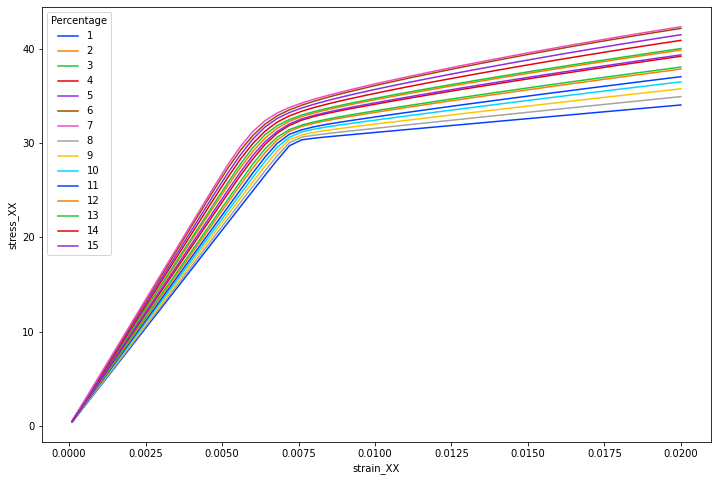

In [39]:
plt.figure(figsize = (12,8))
palette = sns.color_palette("bright", 15)  #Chossing color 
sns.lineplot( x = 'strain_XX', y = 'stress_XX', data = raw_dataset, palette=palette, hue = 'Percentage', legend = 'full')
plt.show()

**Split Data into X & Y**

In [40]:
X = raw_dataset.iloc[:,0:4]
Y = raw_dataset.iloc[:,4:7]

In [41]:
X

,Percentage,strain_XX,strain_XY,strain_YZ
0,1,0.0001,-0.000034,-1.499200e-08
1,1,0.0002,-0.000068,-3.182700e-08
2,1,0.0012,-0.000412,-1.923900e-07
3,1,0.0016,-0.000549,-2.567300e-07
4,1,0.0020,-0.000687,-3.219800e-07
...,...,...,...,...
745,15,0.0184,-0.010528,3.256300e-04
746,15,0.0188,-0.010827,3.360400e-04
747,15,0.0192,-0.011128,3.464400e-04
748,15,0.0196,-0.011430,3.568800e-04


In [42]:
Y

,stress_XX,stress_XY,stress_YZ
0,0.41647,0.002704,0.000003
1,0.83108,0.002189,-0.000001
2,4.98100,0.004208,0.000003
3,6.64090,0.003861,0.000011
4,8.30060,0.003834,0.000011
...,...,...,...
745,38.58800,0.006364,0.000409
746,38.77500,0.006454,0.000419
747,38.96000,0.006539,0.000428
748,39.14400,0.006621,0.000433


**Pre-Processing of Dataset**

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [44]:
# Applying Transformation
scaler_X = scaler.fit(X)
scaled_X = scaler_X.transform(X)

In [45]:
# Applying Transformation
scaler_Y = scaler.fit(Y)
scaled_Y = scaler_Y.transform(Y)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size = 0.1, random_state = 3)

In [47]:
len(X_train)

675

**ANN Regression**

In [48]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [49]:
model=Sequential([
    Dense(64, input_dim=4,activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3)
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 25,539
Trainable params: 25,539
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['accuracy'])

In [52]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 10% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
history = model.fit(X_train, Y_train, validation_split=0.01, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
21/21 - 1s - loss: 0.4185 - accuracy: 0.1153 - val_loss: 0.4156 - val_accuracy: 0.1429
Epoch 2/1000
21/21 - 0s - loss: 0.4083 - accuracy: 0.1243 - val_loss: 0.4046 - val_accuracy: 0.1429
Epoch 3/1000
21/21 - 0s - loss: 0.3983 - accuracy: 0.1452 - val_loss: 0.3939 - val_accuracy: 0.1429
Epoch 4/1000
21/21 - 0s - loss: 0.3883 - accuracy: 0.2111 - val_loss: 0.3835 - val_accuracy: 0.2857
Epoch 5/1000
21/21 - 0s - loss: 0.3785 - accuracy: 0.2320 - val_loss: 0.3733 - val_accuracy: 0.2857
Epoch 6/1000
21/21 - 0s - loss: 0.3688 - accuracy: 0.2500 - val_loss: 0.3631 - val_accuracy: 0.2857
Epoch 7/1000
21/21 - 0s - loss: 0.3592 - accuracy: 0.2605 - val_loss: 0.3531 - val_accuracy: 0.2857
Epoch 8/1000
21/21 - 0s - loss: 0.3497 - accuracy: 0.2844 - val_loss: 0.3431 - val_accuracy: 0.2857
Epoch 9/1000
21/21 - 0s - loss: 0.3403 - accuracy: 0.3189 - val_loss: 0.3331 - val_accuracy: 0.2857
Epoch 10/1000
21/21 - 0s - loss: 0.3309 - accuracy: 0.3488 - val_loss: 0.3230 - val_accuracy: 0.4286

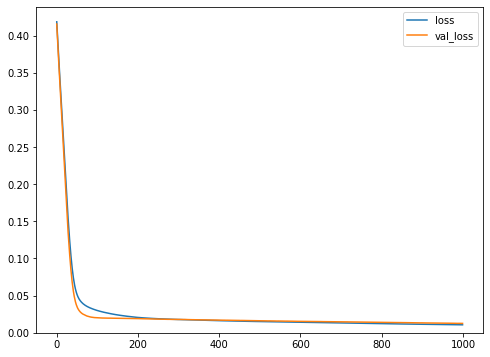

In [53]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize = (8,6))
plt.ylim(bottom=0)
plt.show()

In [54]:
predictions=model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.7396314858663278

In [56]:
sigma=scaler_Y.inverse_transform(predictions)
print(sigma)

[[ 1.21796484e+01  3.40970070e-03  1.35195642e-05]
 [ 3.28777771e+01  6.05119206e-03 -8.07060042e-06]
 [ 1.53312197e+01  3.02660605e-03 -2.35150201e-05]
 [ 2.74060583e+00  2.79408623e-03  3.62052015e-05]
 [ 3.40131340e+01  5.28961606e-03  1.36524643e-04]
 [ 3.95850258e+01  6.48171036e-03 -2.22943010e-04]
 [ 3.47932358e+01  5.47649618e-03  1.86837919e-04]
 [ 2.26796074e+01  3.76358768e-03 -1.57133345e-05]
 [ 3.32333260e+01  4.83549014e-03  2.20224974e-05]
 [ 3.36126671e+01  6.36469852e-03 -8.83950052e-05]
 [ 3.59998550e+01  5.35427639e-03 -9.27323563e-05]
 [ 1.03920174e+01  3.09578888e-03 -8.88998511e-06]
 [ 7.83695507e+00  3.36640445e-03  5.01766226e-05]
 [ 3.60909462e+01  6.77536381e-03 -1.32054294e-04]
 [ 6.85248327e+00  2.93471338e-03  2.85692877e-05]
 [ 4.03619423e+01  6.62072608e-03 -2.29225887e-04]
 [ 3.42065697e+01  5.37470868e-03 -1.36622461e-04]
 [ 3.67309570e+01  5.78415394e-03  9.47126864e-06]
 [ 2.55119362e+01  4.68336837e-03 -2.21930895e-05]
 [ 3.46563454e+01  5.55357477e-

In [57]:
np.savetxt('sigma.csv',sigma, delimiter=',')

In [58]:
model.save('NNforclass.h5')

In [59]:
model.save_weights('NNforclass.h5')

In [60]:
model.get_weights()

[array([[-0.12262214,  0.15537179,  0.27022916, -0.03310245, -0.17756957,
         -0.11089806, -0.279189  ,  0.09736638,  0.06438914, -0.12119035,
         -0.25608143,  0.05324149,  0.22107285, -0.19133866,  0.04231831,
          0.02437006, -0.3197741 ,  0.22738011, -0.26831594, -0.04586105,
          0.11795217, -0.09112103,  0.13340965, -0.00289258, -0.00704029,
         -0.23769821, -0.30760658, -0.0154479 ,  0.06791625,  0.08536271,
         -0.00888451,  0.02880055, -0.13566737, -0.18823928,  0.15265745,
         -0.0059355 ,  0.04365659,  0.26847392, -0.15401588,  0.13924603,
          0.10301853, -0.12793492, -0.17268983,  0.30903274,  0.04219727,
         -0.07190824, -0.06050885,  0.13213651, -0.185114  ,  0.24281225,
          0.10081993,  0.04517313, -0.18448289,  0.3179828 , -0.21293016,
         -0.01352505,  0.07876454,  0.17724046,  0.21072873,  0.24464521,
          0.2242158 ,  0.19459507, -0.2883178 , -0.32957196],
        [ 0.20218058, -0.10625172,  0.2055816 , -0

**Let's try to predict a stress-strain curve**

In [61]:
predict_dataset = raw_dataset[raw_dataset['Percentage']==4]

In [62]:
X_predict = (predict_dataset.iloc[:,0:4])
Y_predict = (predict_dataset.iloc[:,4:7])

In [63]:
predScaler_X = scaler.fit(X_predict)
scaled_X_predict = predScaler_X.transform(X_predict)

In [64]:
new_predictions=model.predict(scaled_X_predict)

In [65]:
predScaler_Y = scaler.fit(Y)
predSigma = predScaler_Y.inverse_transform(new_predictions)

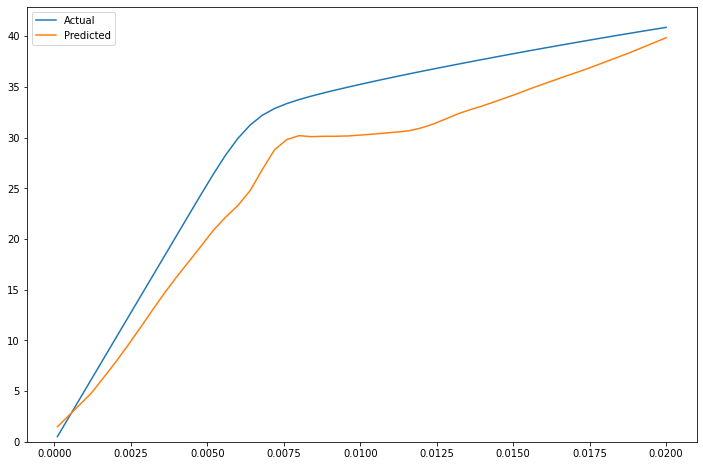

In [66]:
plt.figure(figsize = (12,8))
plt.plot(X_predict.iloc[:,1],Y_predict.iloc[:,0])
plt.plot(X_predict.iloc[:,1],predSigma[:,0])
plt.legend(['Actual','Predicted'])
plt.ylim(bottom=0)
plt.show()